In [32]:
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc.coef import ccc
from ccc import conf

# Settings

In [6]:
INPUT_DIR = conf.DATA_DIR / "rice"

# Read data

In [7]:
data = pd.read_csv(INPUT_DIR / "GSE74793_processed-data.txt.gz", sep="\t")

In [8]:
data.shape

(56143, 475)

In [9]:
data.head()

,ID001,ID145,ID146-2,ID577-2,ID003,ID147,ID004,ID148-2,ID005,ID149,...,ID112,ID264,ID113,ID265,ID114,ID266,ID115,ID267,ID116,ID700
11562.t00001,5.193004,5.862002,5.677783,6.148536,7.169561,5.848352,5.814296,6.564558,5.603167,5.441549,...,6.405620,5.772981,5.508540,6.106203,5.348100,5.370839,5.027650,6.033301,5.647518,5.680368
11562.t00002,2.714230,4.525908,1.855680,3.034859,3.211285,3.018335,2.520385,3.100082,2.458262,2.921606,...,3.530731,2.787587,2.819716,1.855680,3.027852,2.431391,2.875880,2.817800,2.999618,3.352716
11562.t00003,6.756193,6.951303,6.210683,6.772641,6.642736,6.056903,6.657435,6.370991,6.001114,6.665514,...,2.727712,2.520262,1.855680,2.504775,1.855680,2.840253,2.452772,1.855680,2.797547,2.548930
11562.t00004,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,2.480296,...,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680
11562.t00005,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,...,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680,1.855680


# Read metadata

## Explore

In [77]:
metadata = pd.read_csv(INPUT_DIR / "test.tsv", sep="\t")

In [78]:
metadata.shape

(475, 53)

In [79]:
metadata.head()

,run_accession,study_accession,study_title,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_name,library_strategy,...,genotype,treatment,time,tissue,ena_fastq_http,ena_fastq_http_1,ena_fastq_http_2,ena_fastq_ftp,ena_fastq_ftp_1,ena_fastq_ftp_2
0,SRR2931040,SRP065945,Rice gene expression in heat stress and dehydr...,SRX1423934,GSM1933346: ID001; Oryza sativa; RNA-Seq,GSM1933346: ID001; Oryza sativa; RNA-Seq,4530,Oryza sativa,NaN,RNA-Seq,...,"Azuenca (AZ; IRGC#328, Japonica)",CONTROL,15 min,leaf,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/000...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/000...,NaN,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...
1,SRR2931041,SRP065945,Rice gene expression in heat stress and dehydr...,SRX1423935,GSM1933347: ID145; Oryza sativa; RNA-Seq,GSM1933347: ID145; Oryza sativa; RNA-Seq,4530,Oryza sativa,NaN,RNA-Seq,...,"Azuenca (AZ; IRGC#328, Japonica)",CONTROL,15 min,leaf,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/001...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/001...,NaN,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...
2,SRR2931042,SRP065945,Rice gene expression in heat stress and dehydr...,SRX1423936,GSM1933348: ID146-2; Oryza sativa; RNA-Seq,GSM1933348: ID146-2; Oryza sativa; RNA-Seq,4530,Oryza sativa,NaN,RNA-Seq,...,"Azuenca (AZ; IRGC#328, Japonica)",CONTROL,30 min,leaf,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/002...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/002...,NaN,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...
3,SRR2931043,SRP065945,Rice gene expression in heat stress and dehydr...,SRX1423937,GSM1933349: ID577-2; Oryza sativa; RNA-Seq,GSM1933349: ID577-2; Oryza sativa; RNA-Seq,4530,Oryza sativa,NaN,RNA-Seq,...,"Azuenca (AZ; IRGC#328, Japonica)",CONTROL,30 min,leaf,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/003...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/003...,NaN,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...
4,SRR2931044,SRP065945,Rice gene expression in heat stress and dehydr...,SRX1423938,GSM1933350: ID003; Oryza sativa; RNA-Seq,GSM1933350: ID003; Oryza sativa; RNA-Seq,4530,Oryza sativa,NaN,RNA-Seq,...,"Azuenca (AZ; IRGC#328, Japonica)",CONTROL,45 min,leaf,NaN,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/004...,http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR293/004...,NaN,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...,era-fasp@fasp.sra.ebi.ac.uk:vol1/fastq/SRR293/...


In [100]:
sample_cultivars = (
    metadata["genotype"].str.extract("^(.+)\s+\(").rename(columns={0: "cultivar"})
)

In [101]:
sample_cultivars

,cultivar
0,Azuenca
1,Azuenca
2,Azuenca
3,Azuenca
4,Azuenca
...,...
470,Tadukan
471,Tadukan
472,Tadukan
473,Tadukan


In [102]:
sample_cultivars.value_counts()

cultivar      
Tadukan           120
Azuenca           119
Kinandang puti    118
Pandan wangi      118
dtype: int64

In [103]:
sample_cultivars.isna().sum()

cultivar    0
dtype: int64

## Process metadata

In [104]:
metadata = pd.read_csv(
    INPUT_DIR / "test.tsv",
    sep="\t",
    usecols=["run_accession", "experiment_title", "genotype", "treatment", "time"],
)

In [105]:
sample_cultivars = (
    metadata["genotype"].str.extract("^(.+)\s+\(").rename(columns={0: "cultivar"})
)

In [106]:
sample_times = (
    metadata["time"]
    .str.extract("^(\d+) min")
    .rename(columns={0: "time"})
    .astype({"time": float})
)

In [107]:
sample_genotypes = (
    metadata["genotype"].str.extract(", (\S+)\)").rename(columns={0: "genotype"})
)

In [108]:
sample_ids = (
    metadata["experiment_title"]
    .str.extract("^GSM.+: (\S+); ")
    .rename(columns={0: "id"})
)

In [109]:
full_metadata = (
    sample_cultivars.join(sample_ids)
    .join(sample_genotypes)
    .join(sample_times)
    .join(metadata[["treatment"]])
)

In [110]:
full_metadata = full_metadata.set_index("id")

In [111]:
full_metadata.shape

(475, 4)

In [112]:
full_metadata.head()

,cultivar,genotype,time,treatment
id,,,,
ID001,Azuenca,Japonica,15.0,CONTROL
ID145,Azuenca,Japonica,15.0,CONTROL
ID146-2,Azuenca,Japonica,30.0,CONTROL
ID577-2,Azuenca,Japonica,30.0,CONTROL
ID003,Azuenca,Japonica,45.0,CONTROL


In [113]:
full_metadata.isna().any()

cultivar     False
genotype     False
time         False
treatment    False
dtype: bool

# Plot

In [114]:
plot_data = data.T

In [115]:
plot_data

,11562.t00001,11562.t00002,11562.t00003,11562.t00004,11562.t00005,11562.t00006,11562.t00007,11562.t00008,11562.t00009,11562.t00010,...,LOC_Os12g44300,LOC_Os12g44310,LOC_Os12g44320,LOC_Os12g44330,LOC_Os12g44340,LOC_Os12g44350,LOC_Os12g44360,LOC_Os12g44370,LOC_Os12g44380,LOC_Os12g44390
ID001,5.193004,2.714230,6.756193,1.85568,1.85568,4.202174,1.85568,1.85568,1.85568,6.304019,...,1.855680,12.089443,2.467177,10.394158,6.922567,2.714230,9.071079,7.652590,9.311842,8.653017
ID145,5.862002,4.525908,6.951303,1.85568,1.85568,5.756300,1.85568,1.85568,1.85568,5.451745,...,2.916342,11.759443,3.325320,10.436917,7.846680,3.325320,8.960695,7.833796,9.348045,8.412313
ID146-2,5.677783,1.855680,6.210683,1.85568,1.85568,5.467351,1.85568,1.85568,1.85568,5.638107,...,2.481038,12.250328,2.733410,10.243023,7.141072,3.214240,9.186362,7.825500,9.622868,8.627168
ID577-2,6.148536,3.034859,6.772641,1.85568,1.85568,5.861022,1.85568,1.85568,1.85568,6.514525,...,1.855680,11.889669,3.803951,9.899813,6.870506,1.855680,9.059722,8.145588,9.346947,8.709556
ID003,7.169561,3.211285,6.642736,1.85568,1.85568,4.737992,1.85568,1.85568,1.85568,6.092454,...,2.479602,11.568166,2.479602,10.225596,7.282239,3.076517,9.009239,7.575443,9.216855,8.488690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID266,5.370839,2.431391,2.840253,1.85568,1.85568,3.324704,1.85568,1.85568,1.85568,2.840253,...,2.840253,11.685680,2.985652,10.355558,7.659910,1.855680,8.726617,6.764716,9.737205,8.566920
ID115,5.027650,2.875880,2.452772,1.85568,1.85568,2.452772,1.85568,1.85568,1.85568,1.855680,...,1.855680,10.999865,3.155913,10.592558,8.359901,1.855680,8.732623,5.887786,9.135654,8.621833
ID267,6.033301,2.817800,1.855680,1.85568,1.85568,3.023817,1.85568,1.85568,1.85568,2.817800,...,2.817800,11.967512,2.542184,10.651133,7.697635,1.855680,9.272631,7.102412,9.638822,8.584317
ID116,5.647518,2.999618,2.797547,1.85568,1.85568,3.750253,1.85568,1.85568,1.85568,2.527485,...,1.855680,11.903730,3.654283,10.616747,7.450954,1.855680,8.947921,6.979528,9.294844,8.670804


In [116]:
plot_data = plot_data.join(full_metadata, how="inner")

In [117]:
plot_data.shape

(475, 56147)

In [118]:
plot_data.head()

,11562.t00001,11562.t00002,11562.t00003,11562.t00004,11562.t00005,11562.t00006,11562.t00007,11562.t00008,11562.t00009,11562.t00010,...,LOC_Os12g44340,LOC_Os12g44350,LOC_Os12g44360,LOC_Os12g44370,LOC_Os12g44380,LOC_Os12g44390,cultivar,genotype,time,treatment
ID001,5.193004,2.714230,6.756193,1.85568,1.85568,4.202174,1.85568,1.85568,1.85568,6.304019,...,6.922567,2.714230,9.071079,7.652590,9.311842,8.653017,Azuenca,Japonica,15.0,CONTROL
ID145,5.862002,4.525908,6.951303,1.85568,1.85568,5.756300,1.85568,1.85568,1.85568,5.451745,...,7.846680,3.325320,8.960695,7.833796,9.348045,8.412313,Azuenca,Japonica,15.0,CONTROL
ID146-2,5.677783,1.855680,6.210683,1.85568,1.85568,5.467351,1.85568,1.85568,1.85568,5.638107,...,7.141072,3.214240,9.186362,7.825500,9.622868,8.627168,Azuenca,Japonica,30.0,CONTROL
ID577-2,6.148536,3.034859,6.772641,1.85568,1.85568,5.861022,1.85568,1.85568,1.85568,6.514525,...,6.870506,1.855680,9.059722,8.145588,9.346947,8.709556,Azuenca,Japonica,30.0,CONTROL
ID003,7.169561,3.211285,6.642736,1.85568,1.85568,4.737992,1.85568,1.85568,1.85568,6.092454,...,7.282239,3.076517,9.009239,7.575443,9.216855,8.488690,Azuenca,Japonica,45.0,CONTROL


<AxesSubplot:xlabel='LOC_Os08g35305', ylabel='LOC_Os07g43460'>

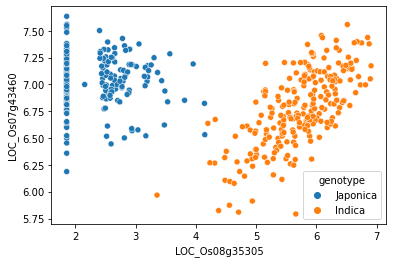

In [119]:
sns.scatterplot(data=plot_data, x="LOC_Os08g35305", y="LOC_Os07g43460", hue="genotype")

In [122]:
plot_data[plot_data["LOC_Os08g35305"] < 2].shape

(133, 56147)

In [124]:
plot_data[plot_data["LOC_Os08g35305"] < 2]

,11562.t00001,11562.t00002,11562.t00003,11562.t00004,11562.t00005,11562.t00006,11562.t00007,11562.t00008,11562.t00009,11562.t00010,...,LOC_Os12g44340,LOC_Os12g44350,LOC_Os12g44360,LOC_Os12g44370,LOC_Os12g44380,LOC_Os12g44390,cultivar,genotype,time,treatment
ID001,5.193004,2.714230,6.756193,1.85568,1.85568,4.202174,1.85568,1.85568,1.85568,6.304019,...,6.922567,2.714230,9.071079,7.652590,9.311842,8.653017,Azuenca,Japonica,15.0,CONTROL
ID145,5.862002,4.525908,6.951303,1.85568,1.85568,5.756300,1.85568,1.85568,1.85568,5.451745,...,7.846680,3.325320,8.960695,7.833796,9.348045,8.412313,Azuenca,Japonica,15.0,CONTROL
ID146-2,5.677783,1.855680,6.210683,1.85568,1.85568,5.467351,1.85568,1.85568,1.85568,5.638107,...,7.141072,3.214240,9.186362,7.825500,9.622868,8.627168,Azuenca,Japonica,30.0,CONTROL
ID577-2,6.148536,3.034859,6.772641,1.85568,1.85568,5.861022,1.85568,1.85568,1.85568,6.514525,...,6.870506,1.855680,9.059722,8.145588,9.346947,8.709556,Azuenca,Japonica,30.0,CONTROL
ID003,7.169561,3.211285,6.642736,1.85568,1.85568,4.737992,1.85568,1.85568,1.85568,6.092454,...,7.282239,3.076517,9.009239,7.575443,9.216855,8.488690,Azuenca,Japonica,45.0,CONTROL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID275,6.025809,1.855680,5.696800,1.85568,1.85568,4.898019,1.85568,1.85568,1.85568,4.980333,...,7.945805,2.427192,9.421317,7.494803,9.282906,8.437548,Pandan wangi,Japonica,210.0,RECOV_DROUGHT
ID124,5.654223,3.012770,5.677602,1.85568,1.85568,4.416756,1.85568,1.85568,1.85568,5.368058,...,8.249459,2.535470,9.383218,6.984599,9.347408,8.491812,Pandan wangi,Japonica,240.0,RECOV_DROUGHT
ID125,5.632969,2.993293,5.765165,1.85568,1.85568,4.589166,1.85568,1.85568,1.85568,5.487268,...,8.360410,1.855680,9.494269,6.150325,8.726001,8.657102,Pandan wangi,Japonica,270.0,RECOV_DROUGHT
ID277,6.012169,2.584225,6.114151,1.85568,1.85568,5.135359,1.85568,1.85568,1.85568,5.012859,...,7.890019,1.855680,9.570735,7.008418,9.463083,8.796482,Pandan wangi,Japonica,270.0,RECOV_DROUGHT


In [123]:
plot_data[plot_data["LOC_Os08g35305"] < 2]["cultivar"].value_counts()

Azuenca         67
Pandan wangi    66
Name: cultivar, dtype: int64

<AxesSubplot:xlabel='LOC_Os05g38530', ylabel='LOC_Os04g01740'>

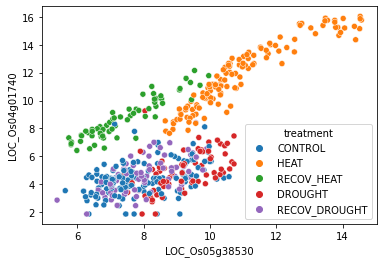

In [120]:
sns.scatterplot(data=plot_data, x="LOC_Os05g38530", y="LOC_Os04g01740", hue="treatment")

# Compute CCC

In [29]:
data_subset = plot_data["LOC_Os08g35305 LOC_Os07g43460 genotype".split()]

In [30]:
ccc_corrs = ccc(data_subset)

In [33]:
ccc_corrs = squareform(ccc_corrs)

In [34]:
ccc_corrs = pd.DataFrame(
    ccc_corrs, index=data_subset.columns.tolist(), columns=data_subset.columns.tolist()
)

In [35]:
ccc_corrs

,LOC_Os08g35305,LOC_Os07g43460,genotype
LOC_Os08g35305,0.000000,0.12474,0.983193
LOC_Os07g43460,0.124740,0.00000,0.124740
genotype,0.983193,0.12474,0.000000
